In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/No_Aug/Lane Detection.v3i.png-mask-semantic.zip'
extract_dir = '/content/drive/MyDrive/No_Aug/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Zip file extracted to {extract_dir}")


Zip file extracted to /content/drive/MyDrive/No_Aug/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2

train_dir = '/content/drive/MyDrive/No_Aug/train/'
val_dir = '/content/drive/MyDrive/No_Aug/valid/'  
test_dir = '/content/drive/MyDrive/No_Aug/test/' 

def load_images_and_masks(data_dir):
    images = []
    masks = []

    for filename in os.listdir(data_dir):
        if filename.endswith('.jpg'):  
            img_path = os.path.join(data_dir, filename)

            base_filename = filename.rsplit('.', 1)[0]  
            mask_filename = f"{base_filename}_mask.png" 
            mask_path = os.path.join(data_dir, mask_filename)

            image = cv2.imread(img_path)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  

            if image is not None and mask is not None:
                images.append(image)
                masks.append(mask)
            else:
                print(f"File does not exist: {img_path} or {mask_path}")

    return np.array(images), np.array(masks)

train_images, train_masks = load_images_and_masks(train_dir)
val_images, val_masks = load_images_and_masks(val_dir)

test_images, test_masks = load_images_and_masks(test_dir)

print("Training images shape:", train_images.shape)
print("Training masks shape:", train_masks.shape)
print("Validation images shape:", val_images.shape)
print("Validation masks shape:", val_masks.shape)
print("Test images shape:", test_images.shape)
print("Test masks shape:", test_masks.shape)

np.save('/content/drive/MyDrive/Lane_Detection_Final/dataset/train_images.npy', train_images)
np.save('/content/drive/MyDrive/Lane_Detection_Final/dataset/train_masks.npy', train_masks)
np.save('/content/drive/MyDrive/Lane_Detection_Final/dataset/val_images.npy', val_images)
np.save('/content/drive/MyDrive/Lane_Detection_Final/dataset/val_masks.npy', val_masks)
np.save('/content/drive/MyDrive/Lane_Detection_Final/dataset/test_images.npy', test_images)
np.save('/content/drive/MyDrive/Lane_Detection_Final/dataset/test_masks.npy', test_masks)

print("Saved training, validation, and test data as NumPy arrays.")


Training images shape: (1900, 640, 640, 3)
Training masks shape: (1900, 640, 640)
Validation images shape: (367, 640, 640, 3)
Validation masks shape: (367, 640, 640)
Test images shape: (146, 640, 640, 3)
Test masks shape: (146, 640, 640)
Saved training, validation, and test data as NumPy arrays.


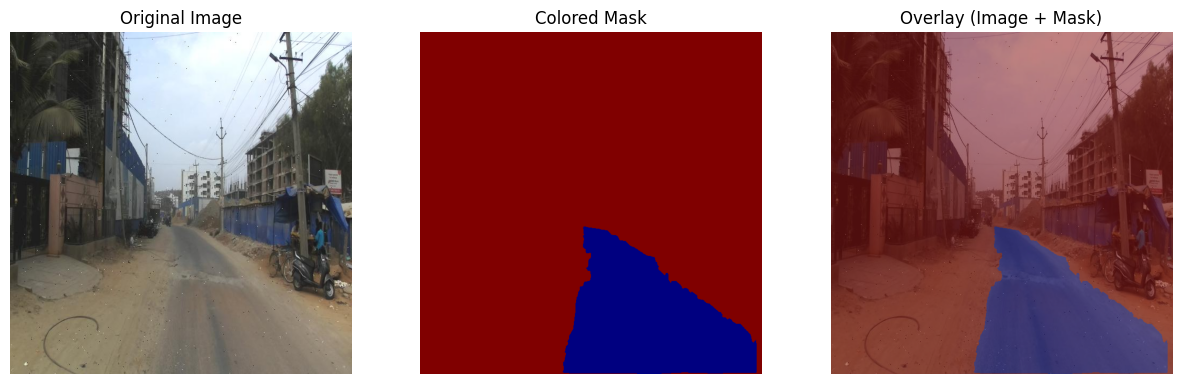

In [ ]:
import matplotlib.pyplot as plt

def overlay_image_and_mask(image, mask, alpha=0.5):
    """
    Overlay a mask on top of an image with transparency.

    :param image: Original image (NumPy array).
    :param mask: Corresponding mask (NumPy array).
    :param alpha: Transparency factor for the mask overlay (0 = transparent, 1 = opaque).
    """
    if image is None or mask is None:
        print("Invalid image or mask!")
        return

    mask_normalized = (mask * 255).astype(np.uint8) if mask.max() <= 1 else mask

    mask_colored = cv2.applyColorMap(mask_normalized, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1 - alpha, mask_colored, alpha, 0)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask_colored)
    plt.title("Colored Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(overlay)
    plt.title("Overlay (Image + Mask)")
    plt.axis("off")

    plt.show()
if len(train_images) > 0 and len(train_masks) > 0:
    overlay_image_and_mask(train_images[2000], train_masks[2000], alpha=0.5)
else:
    print("No images or masks to display!")


In [ ]:
import numpy as np

train_images_path = "/content/drive/MyDrive/Lane_Detection_Final/dataset/train_images.npy"
train_masks_path = "/content/drive/MyDrive/Lane_Detection_Final/dataset/train_masks.npy"
val_images_path = "/content/drive/MyDrive/Lane_Detection_Final/dataset/val_images.npy"
val_masks_path = "/content/drive/MyDrive/Lane_Detection_Final/dataset/val_masks.npy"
test_images_path = "/content/drive/MyDrive/Lane_Detection_Final/dataset/test_images.npy"
test_masks_path = "/content/drive/MyDrive/Lane_Detection_Final/dataset/test_masks.npy"

train_images = np.load(train_images_path)
train_masks = np.load(train_masks_path)
val_images = np.load(val_images_path)
val_masks = np.load(val_masks_path)
test_images = np.load(test_images_path)
test_masks = np.load(test_masks_path)

print("Training images shape:", train_images.shape)
print("Training masks shape:", train_masks.shape)
print("Validation images shape:", val_images.shape)
print("Validation masks shape:", val_masks.shape)
print("Test images shape:", test_images.shape)
print("Test masks shape:", test_masks.shape)


Training images shape: (2415, 640, 640, 3)
Training masks shape: (2415, 640, 640)
Validation images shape: (511, 640, 640, 3)
Validation masks shape: (511, 640, 640)
Test images shape: (146, 640, 640, 3)
Test masks shape: (146, 640, 640)
